# Exploratory Data Analysis (EDA)

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data = pd.read_csv("Pharma_Industry.csv")

In [12]:
data.head()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Drug Dosage (mg)                500 non-null    float64
 1   Systolic Blood Pressure (mmHg)  500 non-null    float64
 2   Heart Rate (BPM)                500 non-null    float64
 3   Liver Toxicity Index (U/L)      500 non-null    float64
 4   Blood Glucose Level (mg/dL)     500 non-null    float64
 5   Drug Response                   500 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 23.6 KB


In [14]:
data.describe()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.0000
mean,-0.037761,0.214957,0.062871,0.054398,-0.171863,0.5200
std,0.979891,1.247567,0.971978,0.986001,0.983765,0.5001
min,-3.019512,-3.773897,-2.940389,-3.401277,-3.110431,0.0000
25%,-0.642003,-0.565168,-0.648157,-0.586085,-0.797715,0.0000
50%,-0.019340,0.201532,0.027732,-0.065661,-0.108106,1.0000
75%,0.641151,0.951375,0.710774,0.633914,0.513555,1.0000
max,2.949094,4.111751,3.193108,3.373269,2.518023,1.0000


In [15]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

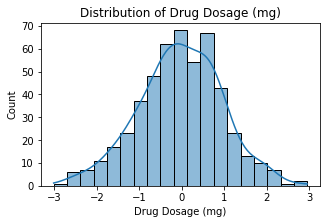

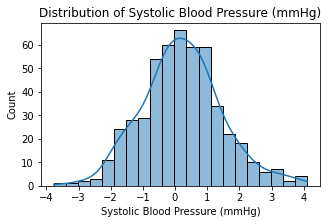

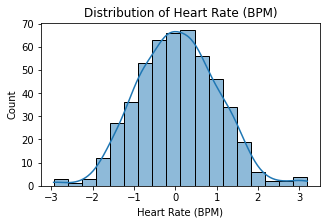

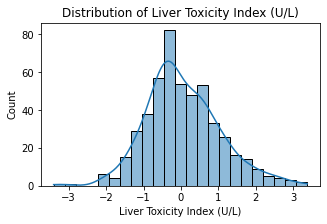

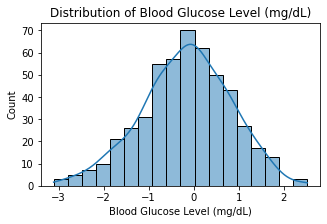

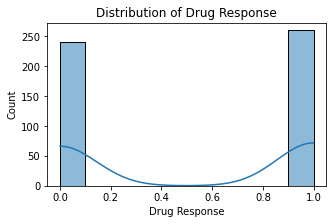

In [16]:
for col in numeric_cols:
    plt.figure(figsize=(5,3))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

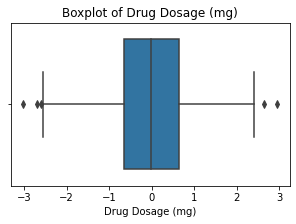

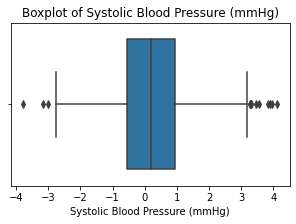

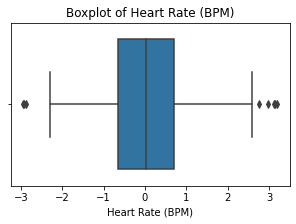

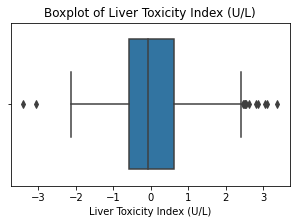

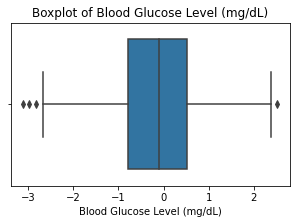

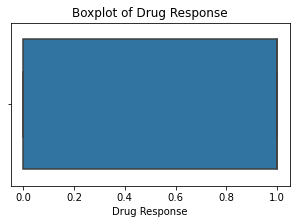

In [17]:
for col in numeric_cols:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

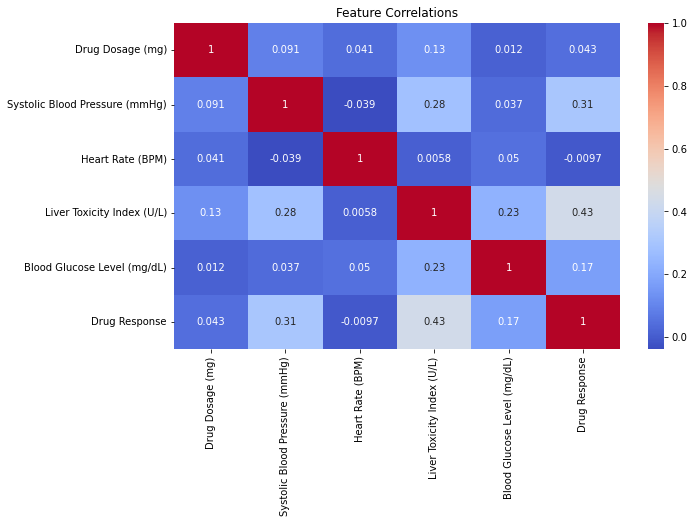

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlations')
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [20]:
cat_cols = data.select_dtypes(include=['object']).columns

In [21]:
for col in cat_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

In [22]:
X = data.drop('Drug Response', axis=1)  # Assuming target column is 'Drug esponse'
y = data['Drug Response']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

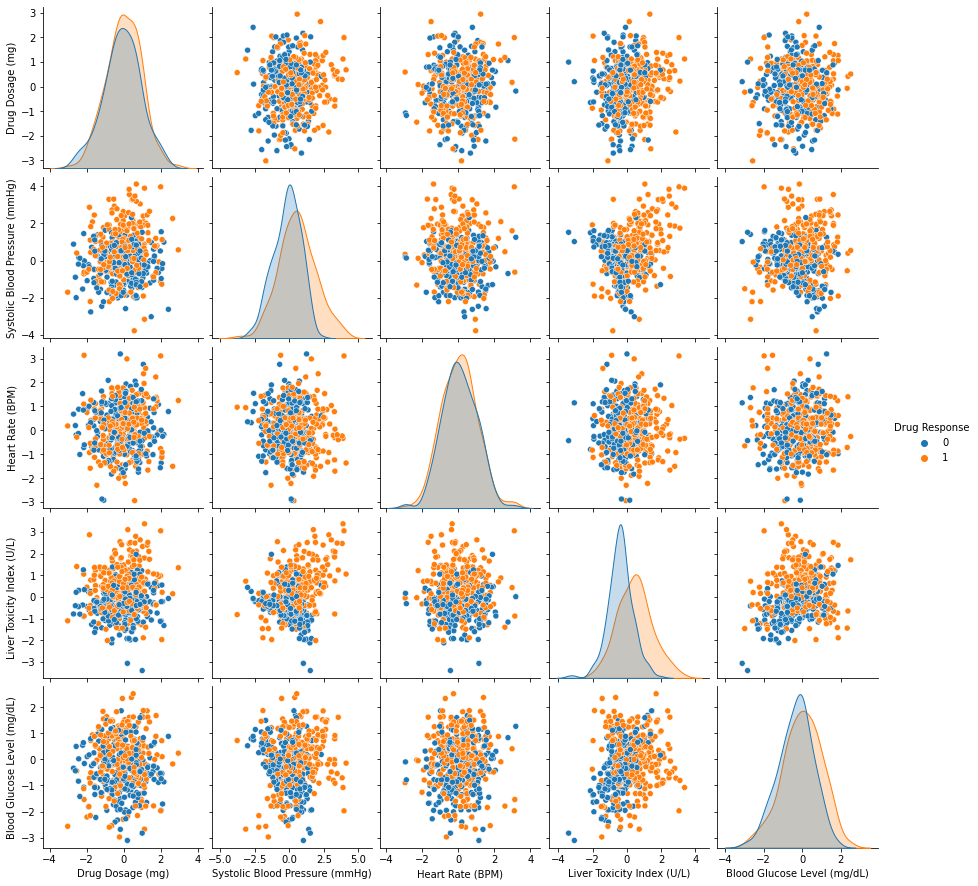

In [24]:
sns.pairplot(data, hue='Drug Response', diag_kind='kde')
plt.show()

# SVM IMPLEMENTATION

In [25]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [26]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [27]:
y_pred = svm_model.predict(X_test)

In [28]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.77      0.84      0.80        44
           1       0.87      0.80      0.83        56

    accuracy                           0.82       100
   macro avg       0.82      0.82      0.82       100
weighted avg       0.82      0.82      0.82       100



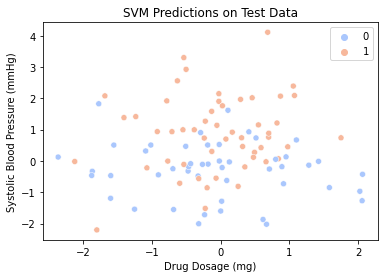

In [29]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=X_test.iloc[:,0], y=X_test.iloc[:,1], hue=y_pred, palette='coolwarm')
plt.title('SVM Predictions on Test Data')
plt.show()

In [30]:
kernels = ['linear', 'poly', 'rbf']

In [31]:
for k in kernels:
    model = SVC(kernel=k, C=1)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

In [32]:
print(f"Kernel: {k}")

Kernel: rbf


In [33]:
print("Accuracy:", accuracy_score(y_test, pred))

Accuracy: 0.82



Linear kernel works well for linearly separable data.

RBF kernel handles complex non-linear relationships.

Polynomial kernel can capture higher-order interactions but may overfit.

SVM is sensitive to feature scaling, works best with normalized/standardized data.

